In [2]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Please install GPU version of TF


2024-12-17 18:58:12.649537: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-17 18:58:12.649954: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os

In [5]:
dataset_path = 'data/'
batch_size = 32
target_size = (224,224)

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
train = train_datagen.flow_from_directory(
    os.path.join(dataset_path,'train'),
    target_size = target_size,
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 760 images belonging to 2 classes.


In [8]:
val = image_dataset_from_directory(
    os.path.join(dataset_path,'test'),
    image_size = (224,224),
    batch_size = batch_size,
    label_mode = 'binary'
)

Found 47 files belonging to 2 classes.


2024-12-17 18:59:30.836042: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-17 18:59:30.836463: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [10]:
from tensorflow.keras.models import Model

In [11]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [12]:
baseModel = MobileNetV2(weights='imagenet', include_top= False)

/tmp/ipykernel_13797/1222651210.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  baseModel = MobileNetV2(weights='imagenet', include_top= False)


In [13]:
x = baseModel.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs = baseModel.input, outputs=predictions)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, None,      │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, None,      │          0 │ bn_Conv1[0][0]    │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │          0 │ expanded_conv_de… │
│ (ReLU)              │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │        512 │ expanded_conv_de… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, None,      │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, None,      │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, None,      │          0 │ block_1_expand_B… │
│ (ReLU)              │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, None,      │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, None,      │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, None,      │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, None,      │          0 │ block_1_depthwis… │
│ (ReLU)              │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, None,      │      2,304 │ block_1_depthwis

 Total params: 3,078,209 (11.74 MB)

 Trainable params: 3,044,097 (11.61 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [14]:
history = model.fit(train,validation_data = val, epochs = 10)

Epoch 1/10


/home/carlos/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-12-17 19:03:11.123961: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.
2024-12-17 19:03:11.170887: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.
2024-12-17 19:03:11.230350: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.
2024-12-17 19:03:11.307262: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156905472 exceeds 10% of free system memory.
2024-12-17 19:03:15.229406:

24/24 ━━━━━━━━━━━━━━━━━━━━ 108s 3s/step - accuracy: 0.8386 - loss: 0.3634 - val_accuracy: 0.5319 - val_loss: 15.2697
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9612 - loss: 0.1230 - val_accuracy: 0.5319 - val_loss: 15.1835
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.9585 - loss: 0.1236 - val_accuracy: 0.5319 - val_loss: 28.2240
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9519 - loss: 0.1529 - val_accuracy: 0.5319 - val_loss: 8.8229
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.9838 - loss: 0.0809 - val_accuracy: 0.5319 - val_loss: 17.3762
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.9691 - loss: 0.1383 - val_accuracy: 0.5319 - val_loss: 7.3164
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.9672 - loss: 0.1116 - val_accuracy: 0.7660 - val_loss: 1.9074
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.9827 - loss: 0.0634 - val_accuracy: 0.5319 - val_loss: 19.32

In [16]:
model.save("paris_model_keras.keras")

In [70]:
mdl = load_model("paris_model_keras.keras")

In [89]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.imagenet_utils import decode_predictions

class_names = ["eiffel", "triomphe"]
img_target = ['trim1.jpg','Arc_de_Triomphe.jpg','eiffel.jpg','Tour_Eiffel.jpg']
image_path = img_target[3]

# Função para carregar e processar a imagem
def preprocess_image(image_path, target_size=(224, 224)):
    # Carrega a imagem
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    
    # Converte a imagem para um array numpy
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    
    # Adiciona uma dimensão (batch) para que o modelo aceite a entrada
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normaliza os pixels para o intervalo [0, 1]
    img_array = img_array / 255.0
    return img_array

# Processar a imagem
input_image = preprocess_image(image_path)


In [90]:
predictions = mdl.predict(input_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


In [95]:
predicted_class_index = (predictions[0] > 0.5).astype(int)  # 0 ou 1
predicted_class = class_names[predicted_class_index[0]]  

confidence = predictions[0][0] if predicted_class_index == 1 else 1 - predictions[0][0]

print(f"Classe prevista: {predicted_class} com confiança de {confidence:.2f}")


Classe prevista: eiffel com confiança de 1.00


In [96]:
print(f"Previsões brutas: {predictions[0]}")

Previsões brutas: [1.7585136e-14]


In [97]:
print(f"Dimensão da entrada: {input_image.shape}")
print(f"Valor máximo: {np.max(input_image)}, Valor mínimo: {np.min(input_image)}")


Dimensão da entrada: (1, 224, 224, 3)
Valor máximo: 1.0, Valor mínimo: 0.0


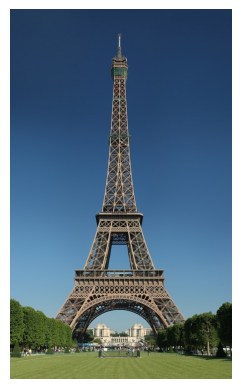

In [98]:
import matplotlib.pyplot as plt

def plot_image(image_path):
    # Carregar a imagem
    img = tf.keras.preprocessing.image.load_img(image_path)
    
    # Exibir a imagem
    plt.imshow(img)
    plt.axis("off")
    plt.show()


plot_image(image_path)
